# Kinases0.9 - Projection with classical methods (PCA, KPCA, MDS, tSNE, UMAP, IsoMap)

In [1]:
import numpy as np
import os 
import pandas as pd
import plotly.express as px
import re
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [2]:
def plot_embedding_interactive_bis(array_emb, df_annot, 
                                   labels_name = None, 
                                   second_labels_name = None, 
                                   labels_text = None, 
                                   show_text = False, 
                                   title = None, 
                                   color_palette = None,
                                   fontsize = 10,
                                   width = 800, 
                                   height = 700):
    """ Function to plot interactive projections (example of methods : PCA, KPCA, MDS, TSNE, Umap, IsoMap)  
    Parameters : 
        array_emb : array, containing the embedding (initial data that are flattened)
        df_annot : dataframe, containing the annotation information of the data 
        labels_name : str, label column from the 'df_annot' for coloring the data
        second_labels_name = str, label column from the 'df_annot' to show label values (labels_text)
        show_text : boolean, if True will show the label values given in the 'labels_text" 
        labels_text : list, list of label values to plot in the projection 
        title : str, title of the projection
        color_palette : dict, personnalized palette for color data 
        fontsize : int, size of title 
        width, heigth : int, dimension of the plot 
    Returns : 
        plt : plotly object, resulting plotly plot 
    """
    
    df_merge = pd.DataFrame(array_emb).merge(df_annot, left_index = True, right_index = True)  
    #print(df_annot.columns)
    #print(df_merge["proteins_id"])
    
    # plot the projection
    plt = px.scatter(df_merge,x=0,y=1,color=df_merge[labels_name],color_discrete_map=color_palette,  
                     color_continuous_scale = "Turbo",
                     hover_name=labels_name, 
                     hover_data=df_annot.columns,
                     width=width, height=height)
    
    # center title and add labels text
    plt.update_layout(title_text=title, title_x=0.5, font_size=fontsize) # center the title 
    if show_text and (not (labels_text is None)):
        if (second_labels_name is None):
            texts = df_annot.loc[df_annot[labels_name].isin(labels_text)]
            labels_idx = texts.index
            #print(texts)
            for i in labels_idx: 
                plt.add_annotation(x=df_merge.loc[i,0], y=df_merge.loc[i,1],
                            text=texts.loc[i, labels_name],
                            showarrow=True,
                            arrowhead=1)
            plt.update_traces(textposition='top right')
        else: 
            texts = df_annot.loc[df_annot[second_labels_name].isin(labels_text)] 
            labels_idx = texts.index 
            for i in labels_idx: 
                plt.add_annotation(x=df_merge.loc[i,0], y = df_merge.loc[i,1], 
                                   text = texts.loc[i, second_labels_name],
                                   showarrow=True, 
                                   arrowhead=1) 
            plt.update_traces(textposition='top right') 
    #plt.update_xaxes(scaleanchor = "y", scaleratio = 1)
    plt.update_yaxes(scaleanchor = "x", scaleratio = 1)
    

    return plt

In [3]:
def pssm_matrix_into_array(repertory_path, withroot = False):
    """
    Construction of PSSM matrix from .aamtx files.
    .aamtx file :  the AA distribution profil of each position of a sequence.
    Parameters : 
        repertory_path : str, the path of repertory containing the ".aamtx" files" 
        withroot : boolean, indicates if the projection should take into account the consensus sequence, default is False
    Returns : 
        protein_mat : list, containing probabilities of each AA, at each position for each sequence, as array
    """
    # count the total number of ".aamtx" files
    if withroot == True :  
        aamtx = [filename for filename in os.listdir(repertory_path)  if re.search("\.aamtx", filename)]
        nb_aamtx = len(aamtx)
        print("Nb of aamtx files, with root sequence :", nb_aamtx) 
        #print("The aamtx files :", aamtx)
    else : 
        aamtx = [filename for filename in os.listdir(repertory_path)  if re.search("\.aamtx", filename) and (filename!="0.aamtx")]
        nb_aamtx = len(aamtx)
        print("Nb of aamtx files, without root sequence : ", nb_aamtx)
        #print("The aamtx files :", aamtx)

    
    # read ".aamtx" files, flatten the content and append into a list
    protein_mat = [] 
    for i in range(1, nb_aamtx): 
        protein = pd.read_csv(repertory_path + "/"+str(i)+".aamtx" , header= None, sep =' ')
        protein = protein.loc[:,'0':'19'] # the first 20 columns corresponding to the 20 AA  
        protein = np.asarray(protein) 
        protein = protein.flatten().T 
        protein_mat.append(protein) 
        
    protein_mat = np.asarray(protein_mat,) 
    protein_mat = pd.DataFrame(protein_mat) 
        

    return protein_mat 

In [4]:
# construction of palette 
kinase_palette = {-1 : "#c7c7c7", "OTHER": "#c7c7c7", "None" :"#c7c7c7", "NA" : "#c7c7c7", "Uncharacterized" : "#c7c7c7", "root": "#000000",
                 "TYR": "#bd065f", "CMGC": "#d5c203", "TKL": "#997e73","STE": "#80b412", # kinase groups 
                 "CK1": "#0dbae9", "AGC": "#00bba1", "CAMK":  "#1f6ed4", "NEK": "#8ce4fa", "RGC":"#f59a62"}

# Data

In [5]:
kinase_color = pd.read_csv("./data/kinase_group_new.csv") # kinase annotation matrix 
kinase_color["proteins_id"] = kinase_color["proteins_id"].astype(str) 
kinase_color 

proteins_id 1_Group    2_Gene      3_HGNC  4_Uni_entry 5_Uni_acc  \
0             1     AGC      AKT1    HGNC:391   AKT1_HUMAN    P31749   
1             2     AGC      AKT2    HGNC:392   AKT2_HUMAN    P31751   
2             3     AGC      AKT3    HGNC:393   AKT3_HUMAN    Q9Y243   
3             4     AGC  CDC42BPA   HGNC:1737  MRCKA_HUMAN    Q5VT25   
4             5     AGC  CDC42BPB   HGNC:1738  MRCKB_HUMAN    Q9Y5S2   
..          ...     ...       ...         ...          ...       ...   
492         493     TYR    TYK2_1  HGNC:12440   TYK2_HUMAN    P29597   
493         494     TYR    TYK2_2  HGNC:12440   TYK2_HUMAN    P29597   
494         495     TYR     TYRO3  HGNC:12446  TYRO3_HUMAN    Q06418   
495         496     TYR      YES1  HGNC:12841    YES_HUMAN    P07947   
496         497     TYR     ZAP70  HGNC:12858  ZAP70_HUMAN    P43403   

     6_Domain_begin  7_Domain_end  8_Domain_length  9_Largest_insert_length  \
0               150           408              259                        9   
1               152           409              258                        9   
2               148           405              258                        9   
3                77           343              267                       14   
4                76           342              267                       14   
..              ...           ...              ...                      ...   
492             589           868              280                       26   
493             897          1171              275                       21   
494             518           788              271                       10   
495             277           528              252                       10   
496             337           595              259                       10   

    10_PDB_validation 11_Conformational_state 12_Dihedral_state  \
0               6NPZB                   DFGin          BLAminus   
1               3E8DB                   DFGin          BLAminus   
2                 NaN                     NaN               NaN   
3                 NaN                     NaN               NaN   
4               5OTFA                   DFGin          BLAminus   
..                ...                     ...               ...   
492             3ZONA                   DFGin               NaN   
493             4GVJA                   DFGin          BLAminus   
494               NaN                     NaN               NaN   
495               NaN                     NaN               NaN   
496             1U59A                   DFGin          BLAminus   

    13_Group_in_Uni 14_Group_in_Manning          15_Synonymn  evo_distance  \
0               AGC                 AGC              PKB,RAC      1.208266   
1               AGC                 AGC                  NaN      1.208312   
2               AGC                 AGC                 PKBG      1.183463   
3               AGC                 AGC             KIAA0451      1.399119   
4               AGC                 AGC             KIAA1124      1.406213   
..              ...                 ...                  ...           ...   
492             TYR                 TYR                  NaN      2.924877   
493             TYR                 TYR                  NaN      2.031230   
494             TYR                 TYR  BYK,DTK,RSE,SKY,TIF      2.428364   
495             TYR                 TYR                  YES      2.450070   
496             TYR                 TYR                  SRK      2.194576   

     decile_domain  
0                2  
1                2  
2                2  
3                5  
4                5  
..             ...  
492              7  
493              6  
494              6  
495              0  
496              2  

[497 rows x 18 columns]

In [6]:
repertory_path = "/home/lavande/ren/PoincareMSA/examples/kinases/fasta0.9/" # path that contains the .aamtx files
kinase_mat = pssm_matrix_into_array(repertory_path, withroot = False) # kinase PSSM matrix
kinase_mat

Nb of aamtx files, without root sequence :  497


0       1       2       3       4       5       6       7       8     \
0    0.1225  0.0307  0.0610  0.0410  0.0508  2.2414  0.1835  0.0508  0.0508   
1    0.1225  0.0307  0.0610  0.0410  0.0508  2.2414  0.1835  0.0508  0.0508   
2    0.1225  0.0307  0.0610  0.0410  0.0508  2.2414  0.1835  0.0508  0.0508   
3    0.1225  0.0307  0.0610  0.0410  0.0508  2.2414  0.1835  0.0508  0.0508   
4    0.1225  0.0307  0.0610  0.0410  0.0508  2.2414  0.1835  0.0508  0.0508   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
491  0.1548  0.0272  0.0728  0.0412  0.0500  0.1732  0.3328  0.0320  0.0776   
492  0.1624  0.0311  0.0694  0.0388  0.0465  0.1394  2.1518  0.0311  0.0771   
493  0.1548  0.0272  0.0728  0.0412  0.0500  0.1732  0.3328  0.0320  0.0776   
494  0.1225  0.0307  0.0610  0.0410  0.0508  2.2414  0.1835  0.0508  0.0508   
495  0.1548  0.0272  0.0728  0.0412  0.0500  0.1732  0.3328  0.0320  0.0776   

       9     ...    4590    4591    4592    4593    4594    4595    4596  \
0    0.0815  ...  0.3875  0.0508  0.0410  0.0410  0.0610  0.0508  0.0713   
1    0.0815  ...  0.3875  0.0508  0.0410  0.0410  0.0610  0.0508  0.0713   
2    0.0815  ...  0.3875  0.0508  0.0410  0.0410  0.0610  0.0508  0.0713   
3    0.0815  ...  0.3875  0.0508  0.0410  0.0410  0.0610  0.0508  0.0713   
4    0.0815  ...  0.3875  0.0508  0.0410  0.0410  0.0610  0.0508  0.0713   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
491  0.1412  ...  0.0804  0.0903  0.1508  0.0754  0.1156  0.1106  0.1056   
492  0.1159  ...  0.1253  0.1034  0.1329  0.0738  0.1181  1.8448  0.1105   
493  0.1412  ...  0.1288  0.1032  0.0838  0.0838  0.2643  0.0966  1.6648   
494  0.0815  ...  0.0690  1.5546  0.0995  0.0690  0.1760  0.1071  0.1227   
495  0.1412  ...  0.0495  0.1709  0.0882  0.0719  0.1378  0.0771  0.0938   

       4597    4598    4599  
0    0.0713  0.1938  0.3363  
1    0.0713  0.1938  0.3363  
2    0.0713  0.1938  0.3363  
3    0.0713  0.1938  0.3363  
4    0.0713  0.1938  0.3363  
..      ...     ...     ...  
491  0.0100  0.0704  0.0352  
492  0.0219  0.0810  0.0591  
493  0.0194  0.1805  0.0450  
494  0.0152  0.0613  0.0537  
495  0.0112  0.0443  0.0331  

[496 rows x 4600 columns]

In [8]:
X_complet = StandardScaler(with_std=False).fit_transform(kinase_mat) # kinase PSSM matrix standardized 

# Kinases0.9 - by 1_Groups

## PCA

In [9]:
pca=decomposition.PCA()
X_PCA_c= pca.fit(X_complet).transform(X_complet)

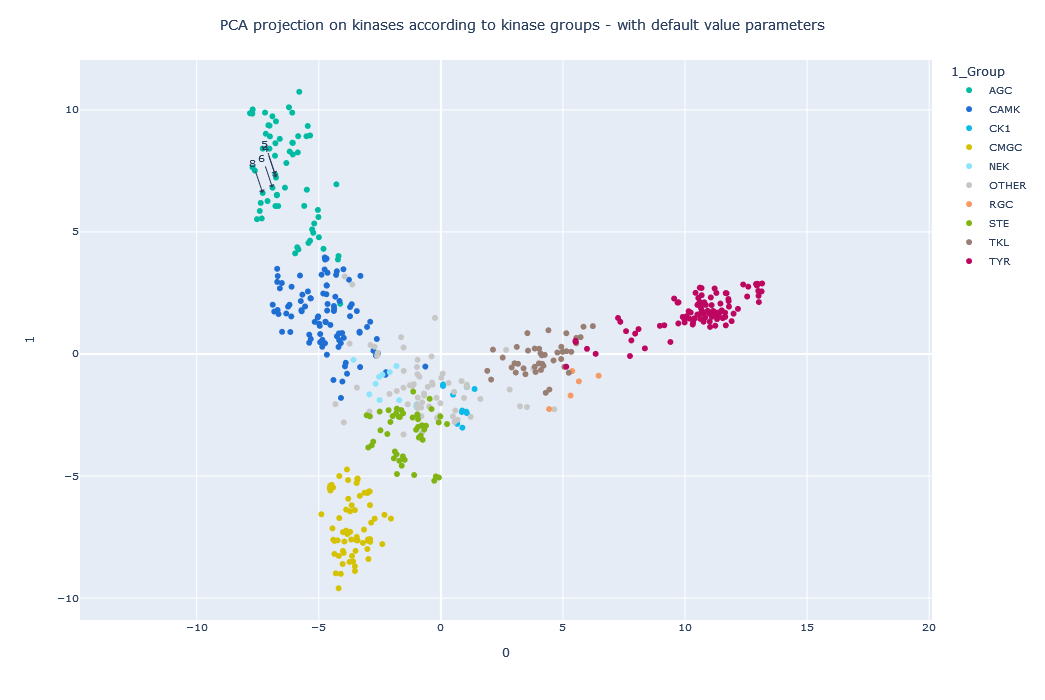

In [67]:
pca_trace= plot_embedding_interactive_bis(array_emb = X_PCA_c, df_annot = kinase_color, 
                               labels_name = "1_Group",
                               show_text = True,
                               second_labels_name = "proteins_id", 
                               labels_text = ['4', '5', '6', '8'], # AGC DMPK subf
                               #labels_text = ['9','10', '11', '12', '13', '14', '15'], # AGC GPRK subf 
                               #labels_text = ['18', '19', '20', '21'], # AGC Microtubule-associated serine/threonine-protein kinase (MAST kinase)
                               #labels_text = ['25', '26', '27', '31', '32', '33', '34', '35', '36', '37', '38', '39'], # AGC PKC subf 
                               #labels_text = ['28', '29', '30', '42', '43'], # AGC cAMP subf  
                               #labels_text = ['44', '45'], # AGC Rho-associated protein kinase (ROCK)
                               #labels_text =  ['46', '47', '48', '49', '50', '51', '52', '53'], # AGC S6 kinase subf
                                          
                               #labels_text = ['66', '67', '88', '93', '94', '95', '96', '97', '105', '106', '121', '122', '135', '136', '137'], # CAMK SNF1 subf
                               #labels_text = ['68', '69', '70', '71', '72', '73', '74', '75'], # CAMK CaMK subf
                               #labels_text = ['82', '83', '84'], # CAMK DAPK subf 
                               #labels_text = ['90', '91', '92'], # CAMK MAPKAP kinase
                               #labels_text = ['98', '99'], # CAMK MAPK interacting Ser/Thr kinase                              
                               #labels_text = ['100', '101', '102', '103'], # CAMK Myosin light chain kinase (MLC kinase)
                                          
                               #labels_text = ['156', '157', '158', '159', '160', '161', '162'], # CK1 Casein kinase I subf  
                                          
                               #labels_text = ['168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189','190', '191', '192', '193', '212', '213', '227',], # CMGC CDC2/CDKX subf 
                               #labels_text = ['214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '228'], # CMGC MAPK1 subf 
                                          
                               #labels_text = ['315', '316', '317', '318', '319', '320', '321'], # STE MAPK2 subf          
                               #labels_text = ['322', '323', '324', '325', '326', '327', '328', '329', '330', '331'], # STE MAKP3 subf        
                               #labels_text = ['332', '333', '334', '335' ,'336', '337', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349' '350' '351' '352' '353' '354' '355', '356', '357', '358', '359', '360', '361'], # STE STE20 subf 
                                          
                               #labels_text = ['362', '363', '364', '365', '366', '367', '368', '371', '372', '373', '401', '402'], # TKL TGFB receptor subf
                            
                               #labels_text = ['410','411', '450', '487', '492'], # TYR TEC subf
                               #labels_text = ['412', '441', '442', '443', '457', '458', '472', '473'], # TYR CSF-1/PDGF subf 
                               #labels_text = ['417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430'], # TYR Ephrin receptor subf
                               #labels_text = ['436','437', '438', '439'], # TYR Fibroblast growth factor receptor subf
                               #labels_text = ['451', '452', '453', '454', '455', '456', '493', '494'], # TYR JAK subf
                               #labels_text = ['479', '480'], # TYR ROR subf                
                               #labels_text = ['488', '489'], # TYR TIE subf
                                          
                               #second_labels_name = "4_Uni_entry", 
                               #labels_text = ['ALK_HUMAN', 'DDR1_HUMAN', 'DDR2_HUMAN', 'IGF1R_HUMAN', 'INSR_HUMAN', 'INSRR_HUMAN', 'LTK_HUMAN', 'NTRK1_HUMAN', 'NTRK2_HUMAN', 'NTRK3_HUMAN', 'ROS1_HUMAN'], # AGC Insulin receptor subf
                               #labels_text = ['FGR_HUMAN', 'BLK_HUMAN', 'FRK_HUMAN', 'FYN_HUMAN', 'HCK_HUMAN', 'LCK_HUMAN', 'LYN_HUMAN', 'SRC_HUMAN', 'SRMS_HUMAN', 'YES_HUMAN'], # TYR SRC subf        
                               title = "PCA projection on kinases according to kinase groups - with default value parameters",
                               color_palette = kinase_palette)
pca_trace.show()

## KPCA

In [29]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(kernel='cosine')
X_transformed = transformer.fit_transform(X_complet)

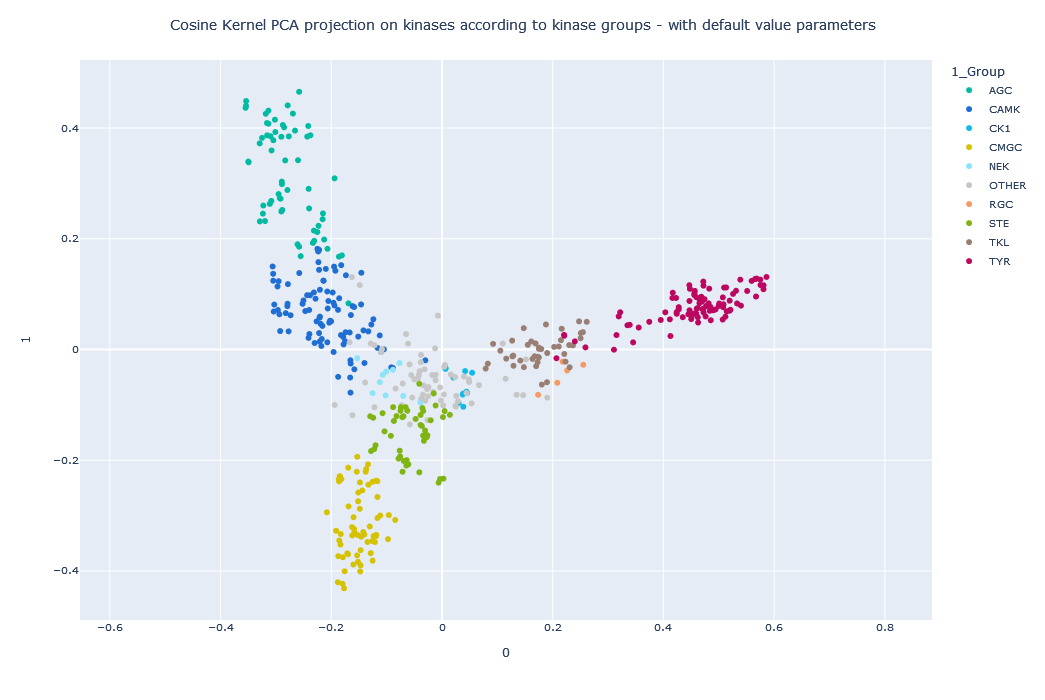

In [30]:
kpca_trace= plot_embedding_interactive_bis(array_emb = X_transformed, df_annot = kinase_color, 
                               labels_name = "1_Group", 
                               show_text = True,
                               #second_labels_name = "proteins_id",
                               title = "Cosine Kernel PCA projection on kinases according to kinase groups - with default value parameters",
                               color_palette = kinase_palette) 

kpca_trace.show()

## MDS

In [31]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

X_cosine= pairwise_distances(X_complet,metric='cosine')
mds_nonmetric = MDS(metric=True,dissimilarity='precomputed', random_state = 42)
X_mds_cosine = mds_nonmetric.fit_transform(X_cosine)

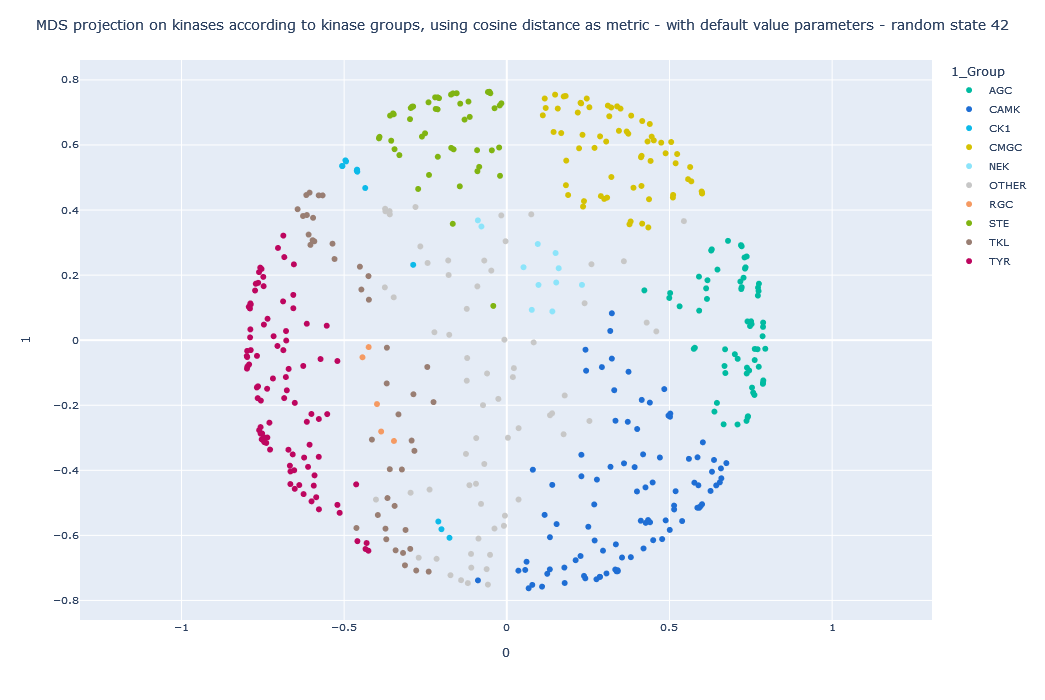

In [32]:
mds_trace= plot_embedding_interactive_bis(array_emb = X_mds_cosine, df_annot = kinase_color, 
                               labels_name = "1_Group", 
                               title = "MDS projection on kinases according to kinase groups, using cosine distance as metric - with default value parameters - random state 42",
                               color_palette = kinase_palette, 
                               #fontsize = 8
                               )
mds_trace.show()

## TSNE

In [33]:
from sklearn.manifold import TSNE
X_embedded = TSNE(random_state = 42).fit_transform(X_complet)

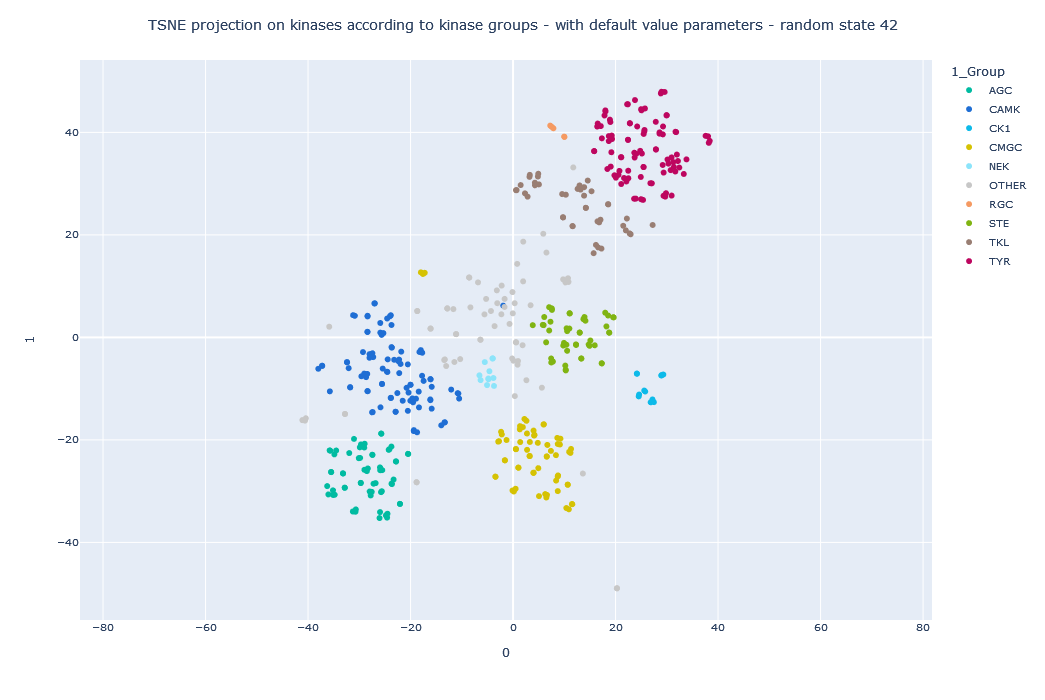

In [34]:
tsne_trace= plot_embedding_interactive_bis(array_emb = X_embedded, df_annot = kinase_color, 
                               labels_name = "1_Group", 
                               title = "TSNE projection on kinases according to kinase groups - with default value parameters - random state 42",
                               color_palette = kinase_palette) 
tsne_trace.show()

## UMAP

In [40]:
import umap

reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X_complet)

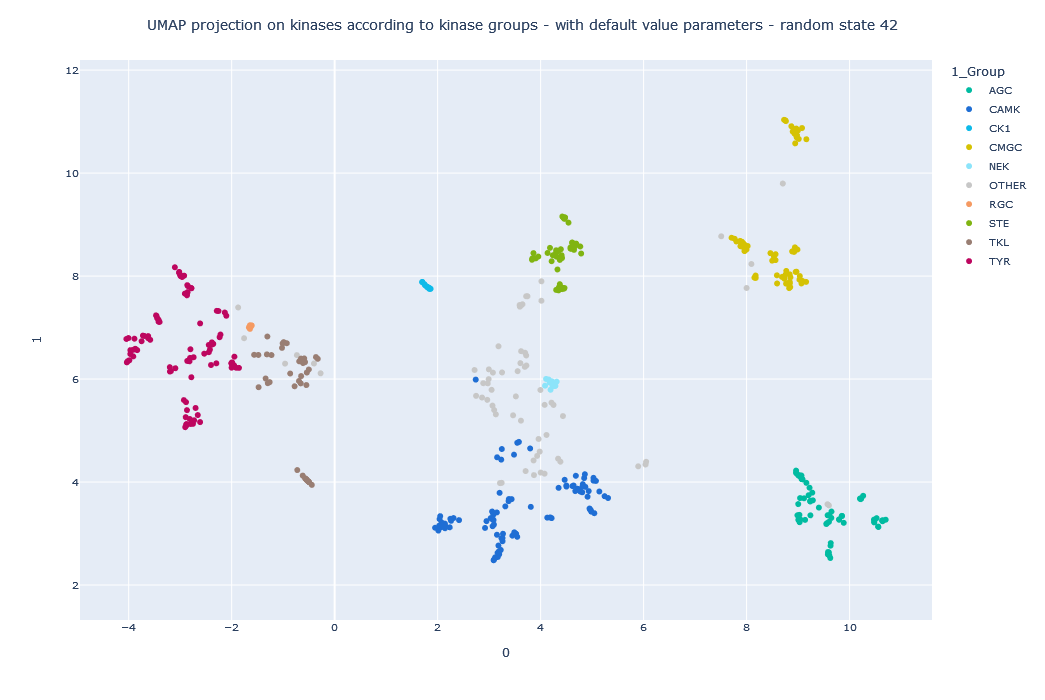

In [41]:
umap_trace= plot_embedding_interactive_bis(array_emb = embedding, df_annot = kinase_color, 
                               labels_name = "1_Group", 
                               title = "UMAP projection on kinases according to kinase groups - with default value parameters - random state 42",
                               color_palette = kinase_palette) 
umap_trace.show()

## IsoMap

In [42]:
from sklearn.manifold import Isomap

iso = Isomap()
array_iso = iso.fit_transform(X_complet)

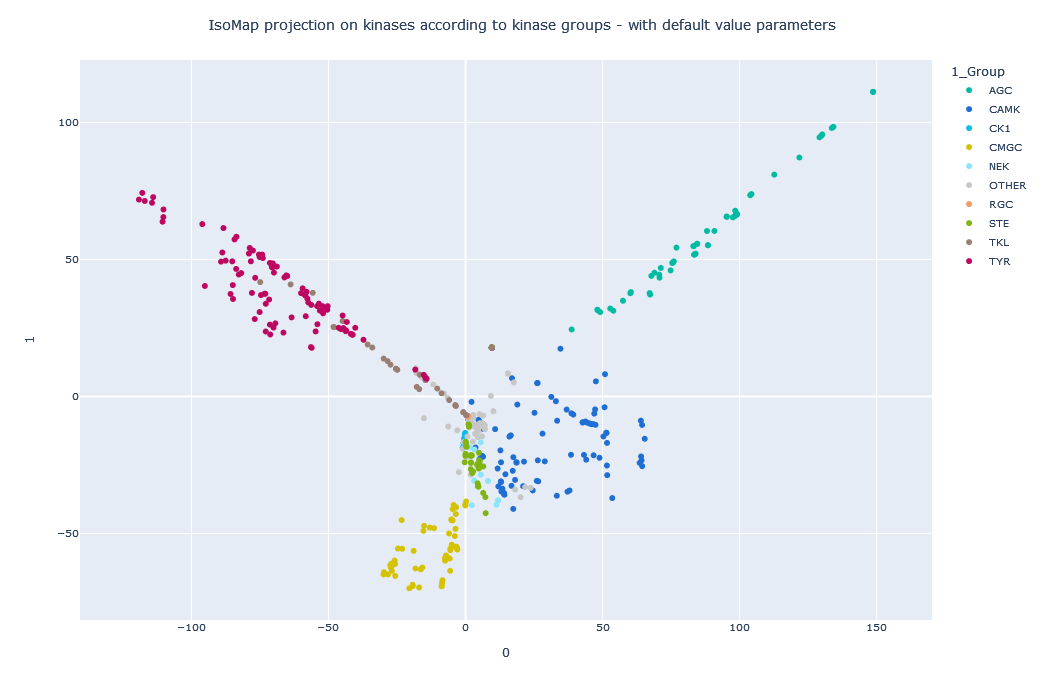

In [43]:
iso_trace= plot_embedding_interactive_bis(array_emb = array_iso, df_annot = kinase_color, 
                               labels_name = "1_Group", 
                               title = "IsoMap projection on kinases according to kinase groups - with default value parameters",
                               color_palette = kinase_palette)
iso_trace.show()

# Globins0.9 - by evo_distance

## PCA

In [44]:
pca=decomposition.PCA()
X_PCA_c= pca.fit(X_complet).transform(X_complet)

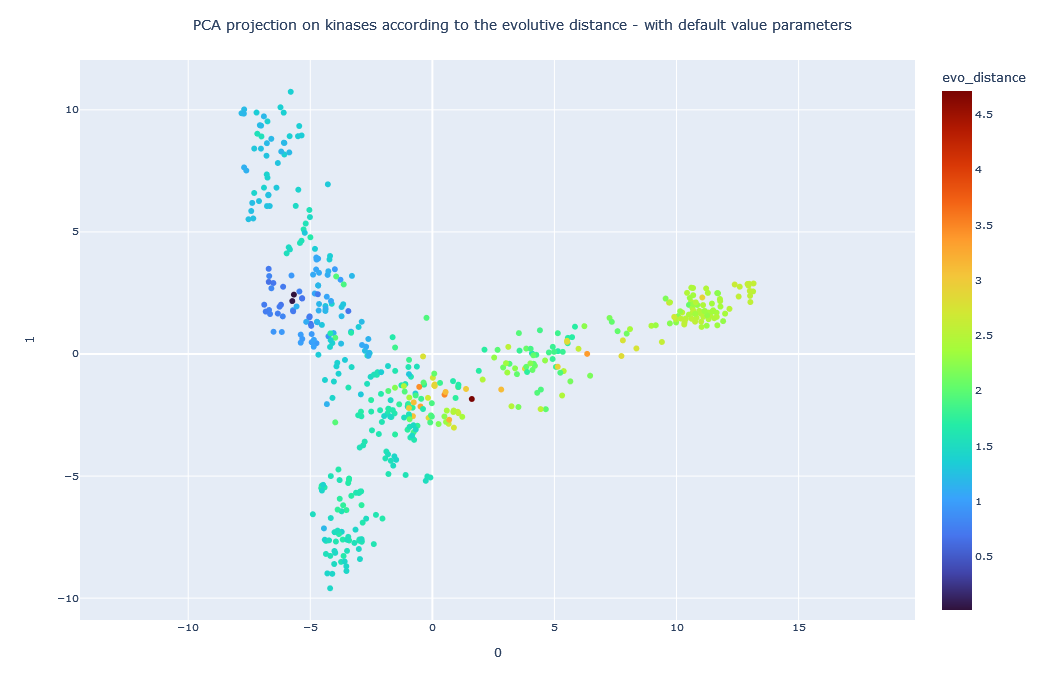

In [45]:
pca_trace= plot_embedding_interactive_bis(array_emb = X_PCA_c, df_annot = kinase_color, 
                               labels_name = "evo_distance", 
                               title = "PCA projection on kinases according to the evolutive distance - with default value parameters",
                               color_palette = kinase_palette)
pca_trace.show()

## KPCA

In [46]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(kernel='cosine')
X_transformed = transformer.fit_transform(X_complet)

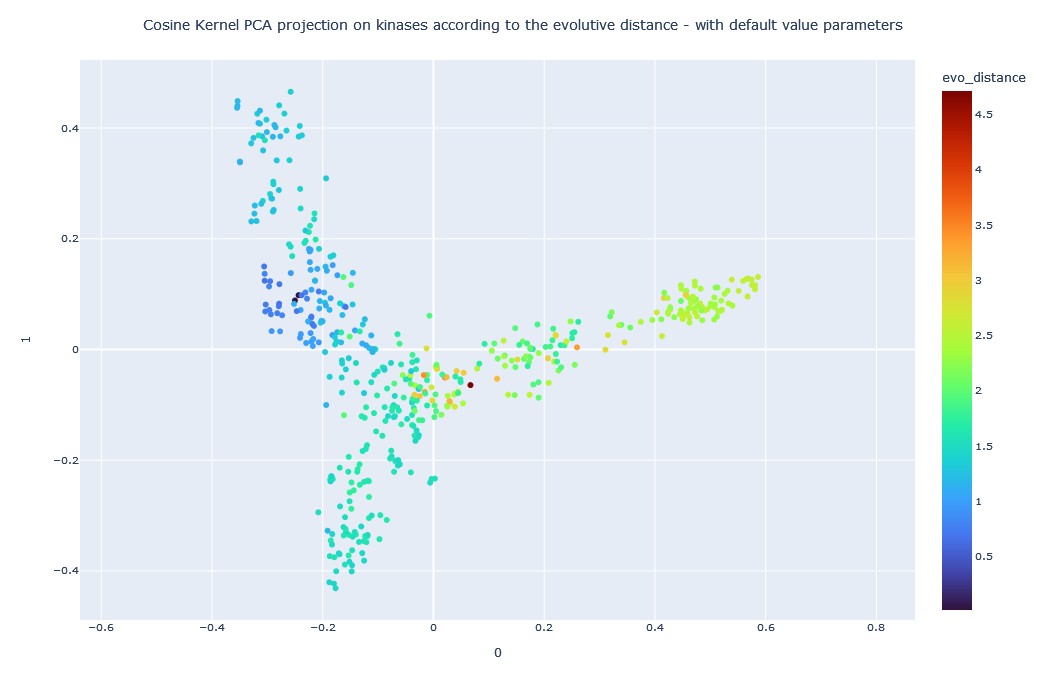

In [47]:
kpca_trace= plot_embedding_interactive_bis(array_emb = X_transformed, df_annot = kinase_color, 
                               labels_name = "evo_distance", 
                               title = "Cosine Kernel PCA projection on kinases according to the evolutive distance - with default value parameters",
                               color_palette = kinase_palette) 

kpca_trace.show()

## MDS

In [48]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
X_cosine= pairwise_distances(X_complet,metric='cosine')
mds_nonmetric = MDS(metric=True,dissimilarity='precomputed', random_state = 42)
X_mds_cosine = mds_nonmetric.fit_transform(X_cosine)

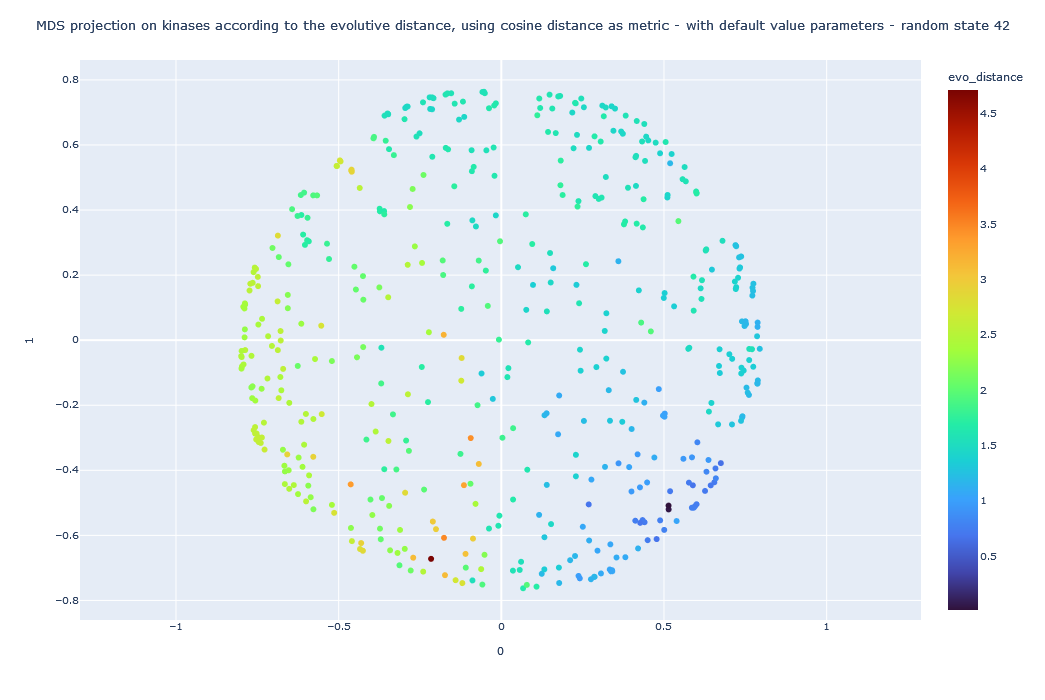

In [49]:
mds_trace= plot_embedding_interactive_bis(array_emb = X_mds_cosine, df_annot = kinase_color, 
                               labels_name = "evo_distance", 
                               title = "MDS projection on kinases according to the evolutive distance, using cosine distance as metric - with default value parameters - random state 42",
                               color_palette = kinase_palette, 
                               fontsize = 9)
mds_trace.show()

## TSNE

In [50]:
from sklearn.manifold import TSNE
X_embedded = TSNE(random_state = 42).fit_transform(X_complet)

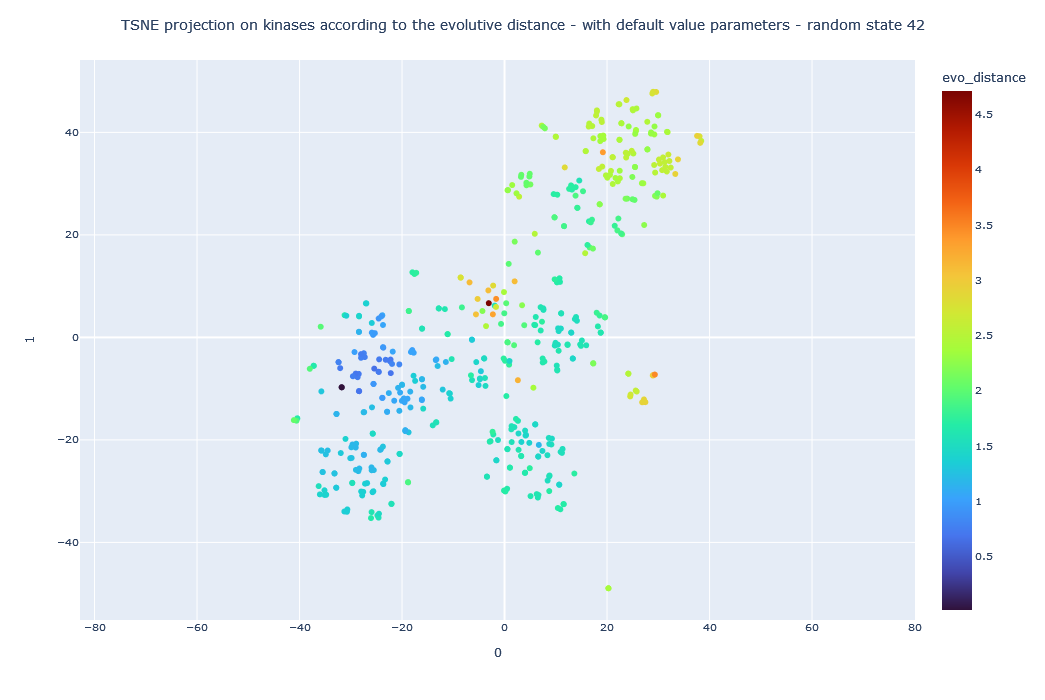

In [51]:
tsne_trace= plot_embedding_interactive_bis(array_emb = X_embedded, df_annot = kinase_color, 
                               labels_name = "evo_distance", 
                               title = "TSNE projection on kinases according to the evolutive distance - with default value parameters - random state 42",
                               color_palette = kinase_palette) 
tsne_trace.show()

## UMAP

In [52]:
import umap

reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X_complet)

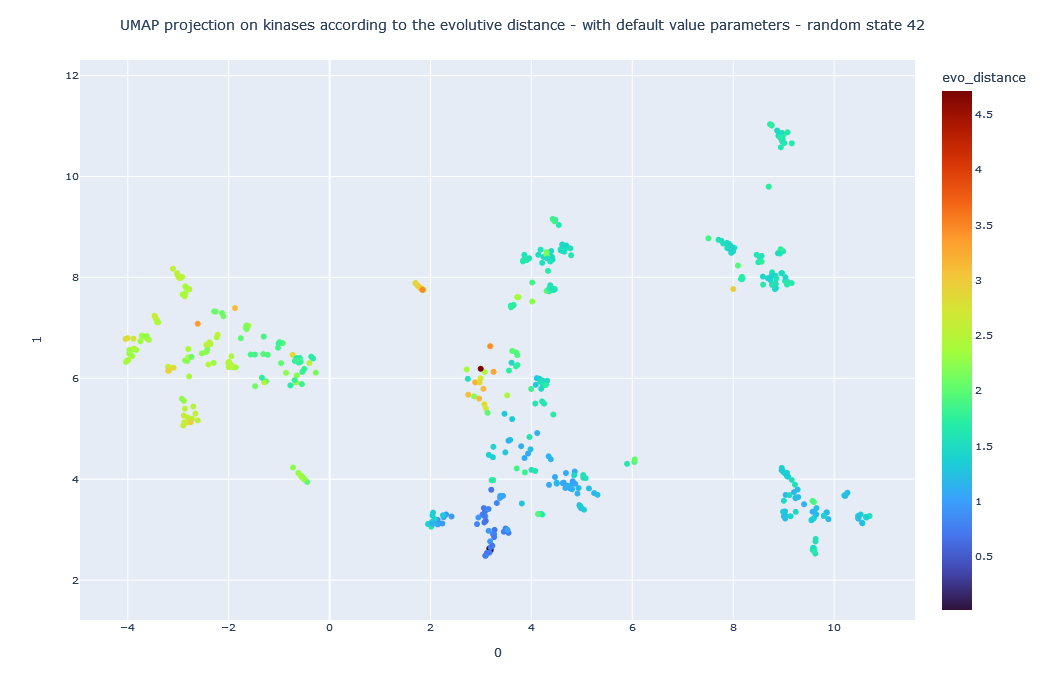

In [53]:
umap_trace= plot_embedding_interactive_bis(array_emb = embedding, df_annot = kinase_color, 
                               labels_name = "evo_distance", 
                               title = "UMAP projection on kinases according to the evolutive distance - with default value parameters - random state 42",
                               color_palette = kinase_palette) 
umap_trace.show()

## IsoMap

In [54]:
from sklearn.manifold import Isomap

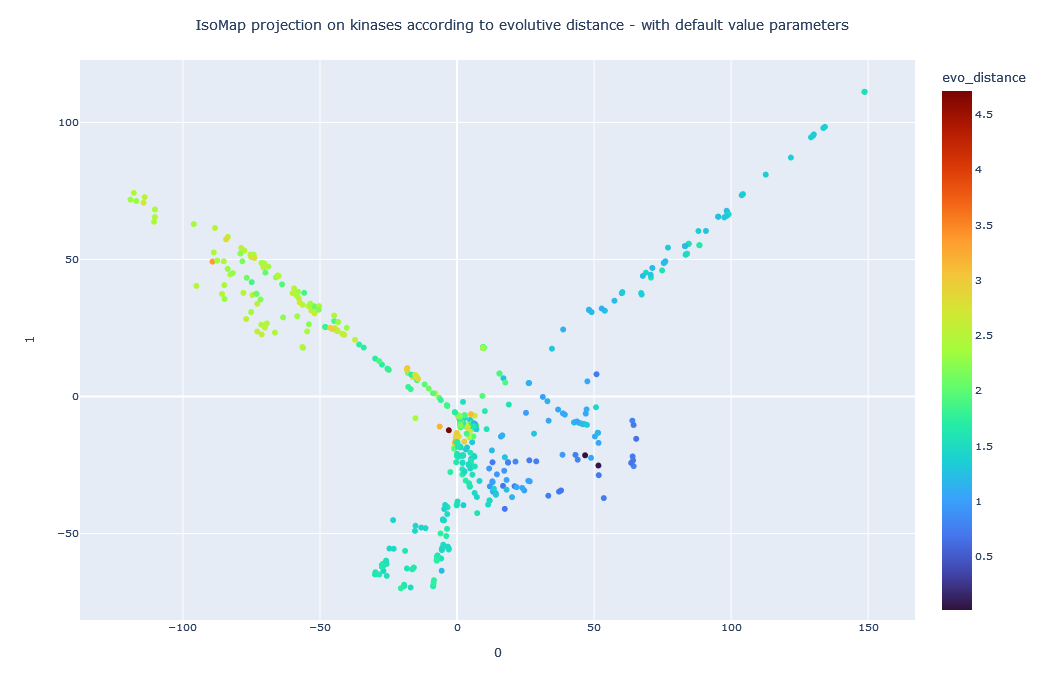

In [55]:
iso = Isomap()
array_iso = iso.fit_transform(X_complet)
iso_trace= plot_embedding_interactive_bis(array_emb = array_iso, df_annot = kinase_color, 
                               labels_name = "evo_distance", 
                               title = "IsoMap projection on kinases according to evolutive distance - with default value parameters",
                               color_palette = kinase_palette)
iso_trace.show()